<a href="https://colab.research.google.com/github/yasminhegy-byte/now-ui-kit-react/blob/main/paper4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import, EDA, split, train

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.inspection import (PartialDependenceDisplay, permutation_importance)
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from sklearn.tree import export_graphviz


In [ ]:
df = pd.read_csv('train.csv')
print(df.shape)

(44720, 28)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44720 non-null  object 
 1   Customer_ID               44720 non-null  object 
 2   Month                     44720 non-null  object 
 3   Name                      40262 non-null  object 
 4   Age                       44720 non-null  object 
 5   SSN                       44720 non-null  object 
 6   Occupation                44720 non-null  object 
 7   Annual_Income             44720 non-null  object 
 8   Monthly_Inhand_Salary     38055 non-null  float64
 9   Num_Bank_Accounts         44719 non-null  float64
 10  Num_Credit_Card           44719 non-null  float64
 11  Interest_Rate             44719 non-null  float64
 12  Num_of_Loan               44719 non-null  object 
 13  Type_of_Loan              39664 non-null  object 
 14  Delay_

In [ ]:
df.isna().sum

<bound method DataFrame.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
44715  False        False  False  False  False  False       False   
44716  False        False  False  False  False  False       False   
44717  False        False  False  False  False  False       False   
44718  False        False  False  False  False  False       False   
44719  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                   True              False  ...   
2              False                   True              False  ...   
3              False                   True              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
44715          False                  False              False  ...   
44716          False                  False              False  ...   
44717          False                   True              False  ...   
44718          False                  False              False  ...   
44719          False                   True               True  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
44715       False             False                     False   
44716       False             False                     False   
44717       False             False                     False   
44718       False             False                     False   
44719        True              True                      True   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                    True                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
44715               False                  False                False   
44716               False                  False                False   
44717               False                  False                False   
44718               False                  False                False   
44719                True                   True                 True   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
44715                    False              False            False   
44716                    False              False            False   

drop unwanted columns (name)

In [ ]:
df = df.drop(['Name'], axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isna().sum()


,0
ID,0
Customer_ID,0
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


In [ ]:
df.shape

(26392, 27)

categories of Credit_Score

In [ ]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

drop unwanted coulmns

In [ ]:
columns =  ["ID", "Customer_ID", "SSN"]
df = df.drop(columns=columns)


Clean non numric characters and convert column to numeric type coercing invalid values to NaN

In [ ]:
numeric_columns = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace("[^0-9.]", "", regex=True), errors='coerce')

In [ ]:
df = df.dropna(how='any')
df.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Split Data for Training

In [ ]:
target_col = 'Credit_Score'
y = df[target_col]
X = df.select_dtypes(exclude=['object'])

y_encoded = pd.get_dummies(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (15501, 16), (15501, 3)
Validation: (5167, 16), (5167, 3)
Test: (5167, 16), (5167, 3)


In [ ]:
X_train.isna().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


#Paper 3

ref : https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1138&context=sciendoc

In [ ]:
y_train_1d = np.argmax(y_train, axis=1)
print("y_train shape:", y_train_1d.shape)


y_train shape: (34620,)


 Multi-Class Logistic Regression

In [ ]:
y_train_1d = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train
y_val_1d = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val
y_test_1d = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

Train the LR

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train_1d)

LogisticRegression(max_iter=1000, random_state=42)

Prediction and evaluation

In [ ]:
y_val_pred = logreg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val_1d, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val_1d, y_val_pred))

Validation Accuracy: 0.5246100519930675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1892
           1       0.00      0.00      0.00      3594
           2       0.52      1.00      0.69      6054

    accuracy                           0.52     11540
   macro avg       0.17      0.33      0.23     11540
weighted avg       0.28      0.52      0.36     11540



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Coefficient Analysis (One-vs-Rest)


Class 0 - Top Features:
                    Feature   Coefficient  Class
15          Monthly_Balance -1.386294e-27      0
1             Annual_Income -2.544712e-44      0
2     Monthly_Inhand_Salary -3.829139e-46      0
11         Outstanding_Debt -2.902709e-46      0
13      Total_EMI_per_month -1.843105e-46      0
14  Amount_invested_monthly -8.055711e-47      0
0                       Age -1.579800e-47      0
5             Interest_Rate -1.076296e-47      0
8    Num_of_Delayed_Payment -4.720393e-48      0
7       Delay_from_due_date -4.350938e-48      0

Class 1 - Top Features:
                     Feature   Coefficient  Class
15           Monthly_Balance -1.386294e-27      1
1              Annual_Income -4.196433e-45      1
2      Monthly_Inhand_Salary -2.579355e-46      1
11          Outstanding_Debt  1.275871e-46      1
13       Total_EMI_per_month -2.876023e-47      1
14   Amount_invested_monthly -1.314359e-47      1
0                        Age -3.445531e-48      1
7        De

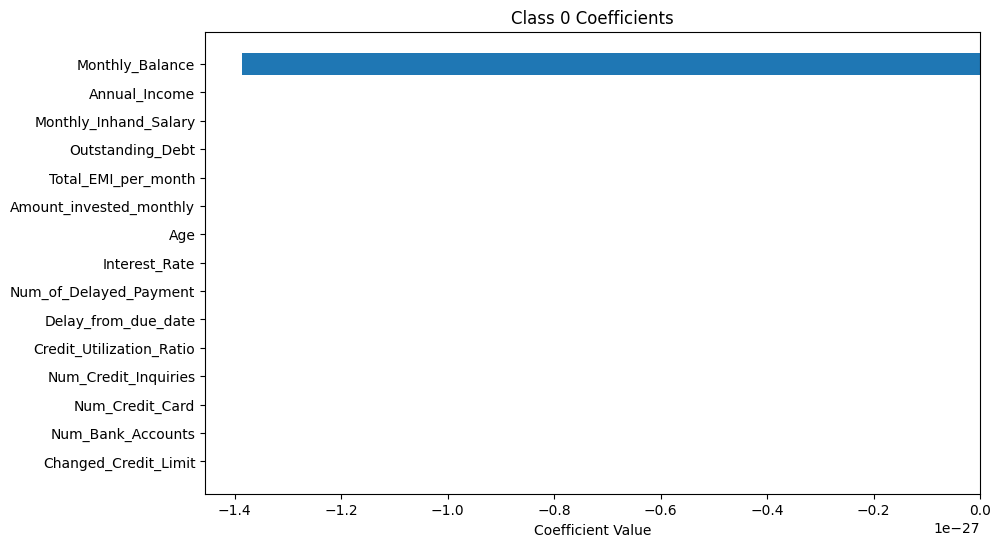

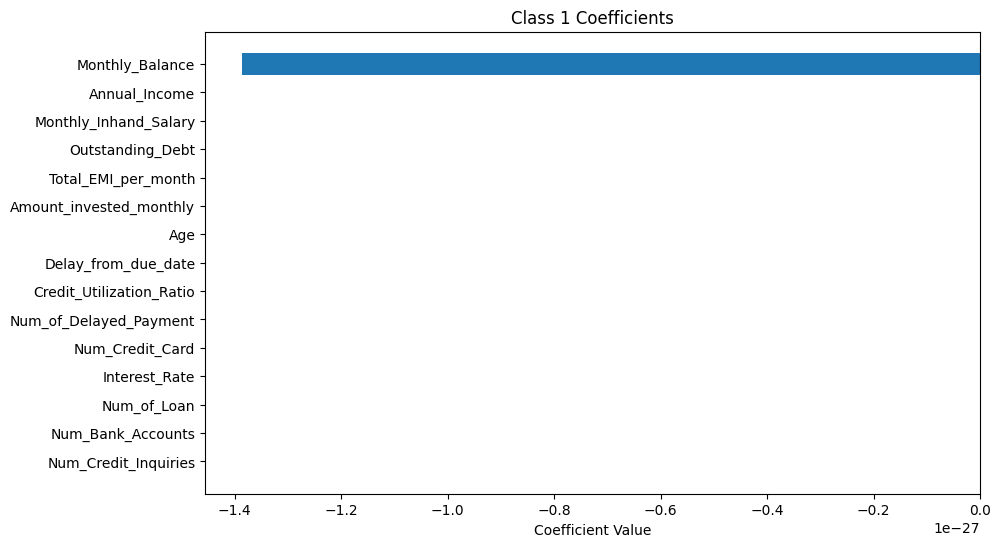

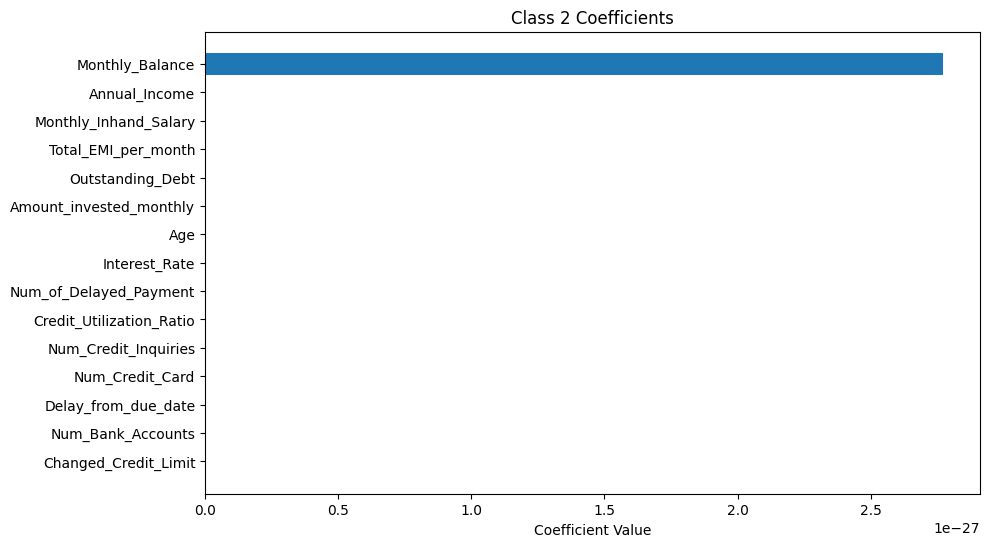

In [ ]:
coef_dfs = []
for i, class_name in enumerate(logreg.classes_):
    coef_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Coefficient": logreg.coef_[i],
        "Class": class_name
    }).sort_values("Coefficient", key=abs, ascending=False)
    coef_dfs.append(coef_df)

    print(f"\nClass {class_name} - Top Features:")
    print(coef_df.head(10))

for i, class_name in enumerate(logreg.classes_):
    plt.figure(figsize=(10, 6))
    plt.barh(coef_dfs[i]["Feature"].head(15),
             coef_dfs[i]["Coefficient"].head(15))
    plt.title(f"Class {class_name} Coefficients")
    plt.xlabel("Coefficient Value")
    plt.gca().invert_yaxis()
    plt.show()


coefficients (weights) for each feature and class

Feature Coefficients per Class:
            Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -1.579800e-47  -2.544712e-44          -3.829139e-46      -2.613605e-48   
1 -3.445531e-48  -4.196433e-45          -2.579355e-46       1.401834e-49   
2  1.924354e-47   2.964356e-44           6.408494e-46       2.473422e-48   

   Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
0    -3.060138e-48  -1.076296e-47 -1.606901e-48        -4.350938e-48   
1     2.757873e-49  -2.493192e-49 -1.457796e-49         1.670914e-48   
2     2.784351e-48   1.101227e-47  1.752681e-48         2.680024e-48   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0           -4.720393e-48         -1.889320e-48         -4.109962e-48   
1           -2.761798e-49         -6.769316e-50          7.791612e-50   
2            4.996573e-48          1.957013e-48          4.032046e-48   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0     -2.90

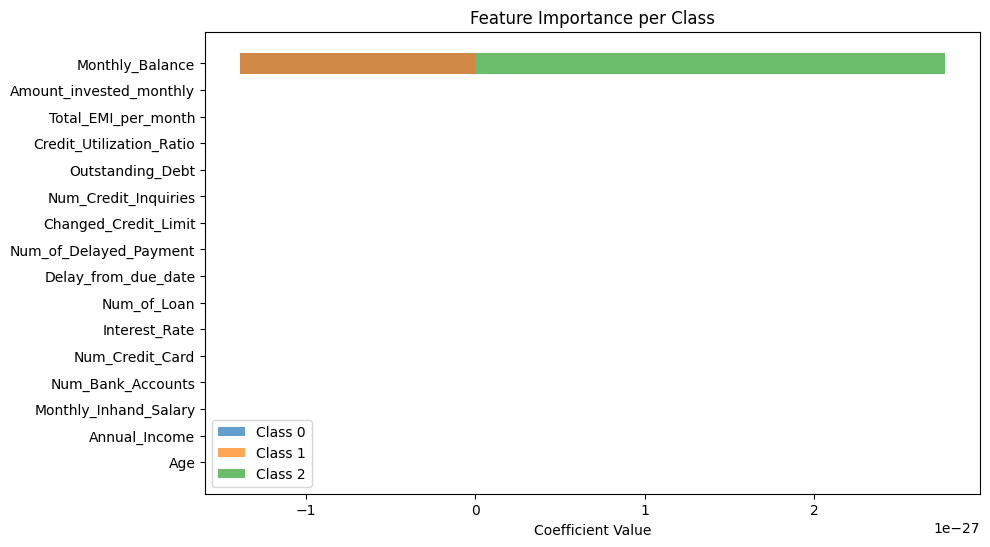

In [ ]:
coef_df = pd.DataFrame(
    logreg.coef_,
    columns=X_train.columns,
    index=logreg.classes_
)

print("Feature Coefficients per Class:")
print(coef_df)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(logreg.classes_):
    plt.barh(X_train.columns, logreg.coef_[i], alpha=0.7, label=f'Class {class_name}')
plt.legend()
plt.xlabel("Coefficient Value")
plt.title("Feature Importance per Class")
plt.show()

Confusion Matrix (Validation Set) for LR

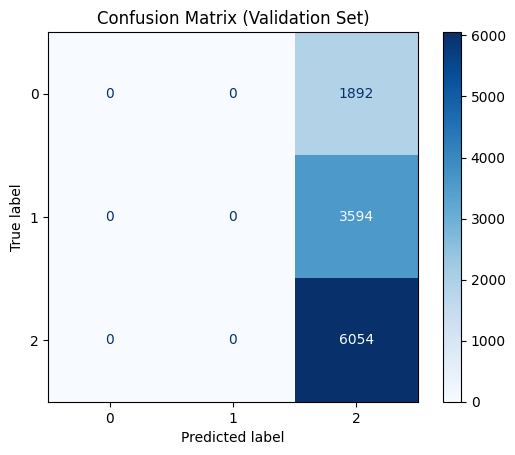

In [ ]:
y_val_pred = logreg.predict(X_val)
cm = confusion_matrix(y_val_1d, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

PDP

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



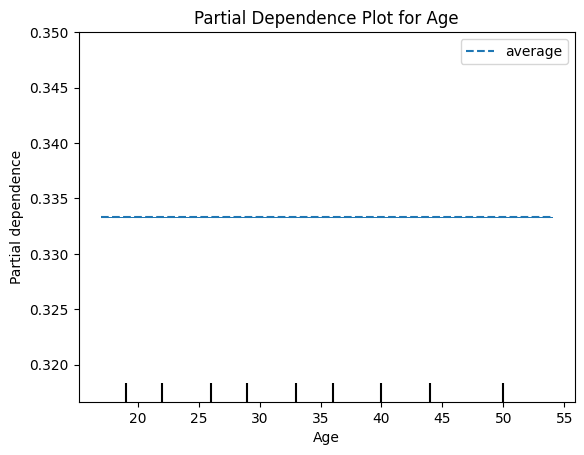

In [ ]:
feature_name = X_train.columns[0]
PartialDependenceDisplay.from_estimator(
    logreg,
    X_val,
    features=[feature_name],
    target=0,
    kind="both"
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

GLM model For Multinomial Logistic Regression

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_val_sm = sm.add_constant(X_val)

glm_model = sm.MNLogit(y_train_1d, X_train_sm)
glm_results = glm_model.fit()

print(glm_results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning:

invalid value encountered in divide



Optimization terminated successfully.
         Current function value: nan
         Iterations 2
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                34620
Model:                        MNLogit   Df Residuals:                    34586
Method:                           MLE   Df Model:                           32
Date:                Sat, 03 May 2025   Pseudo R-squ.:                     nan
Time:                        14:12:25   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -34440.
Covariance Type:            nonrobust   LLR p-value:                       nan
                     y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                           nan        nan        nan        nan         nan     

SHAP Approach


SHAP Summary for Class 0:


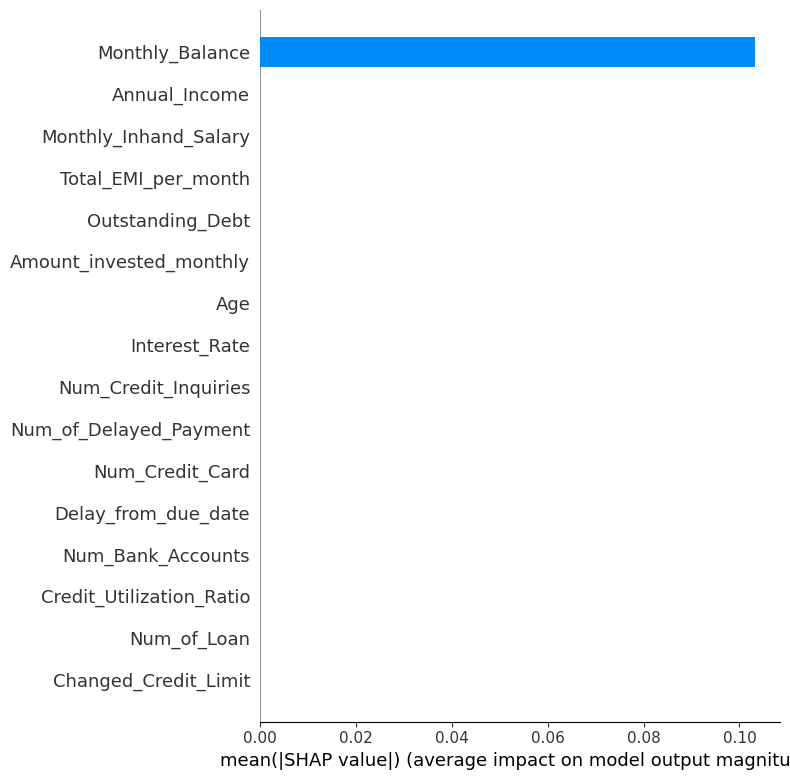


SHAP Summary for Class 1:


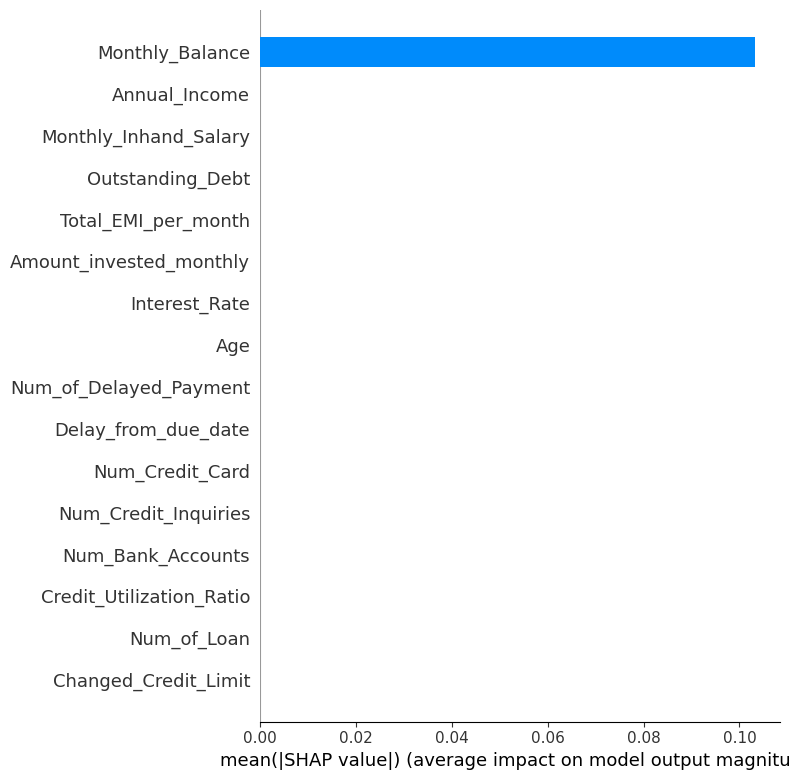


SHAP Summary for Class 2:


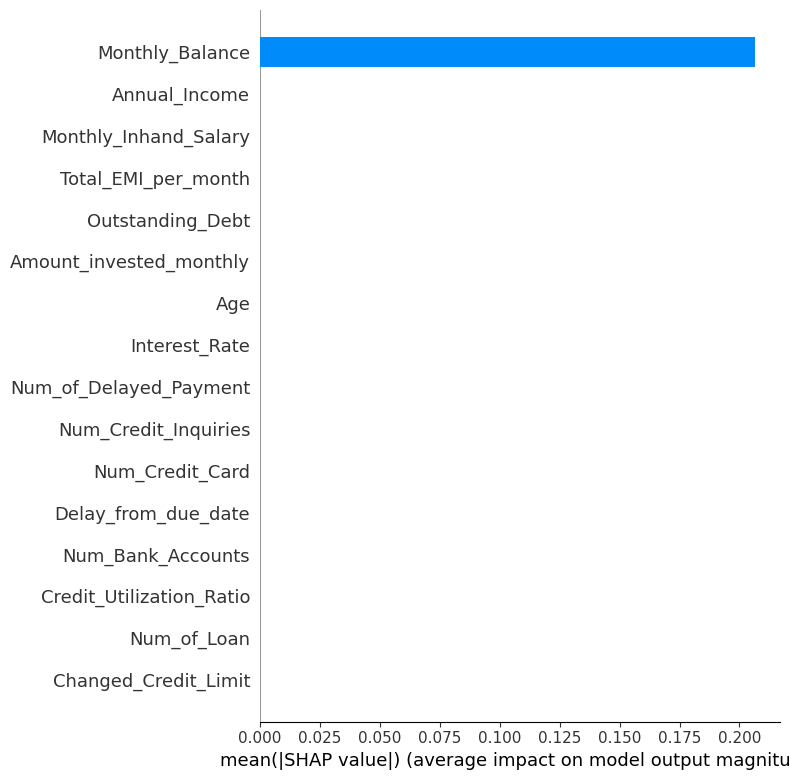

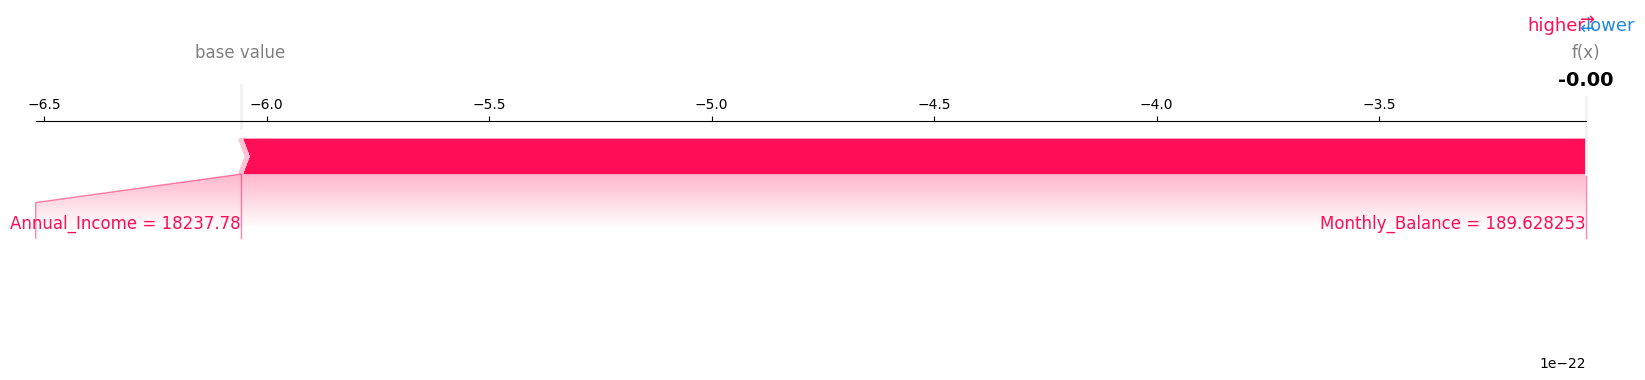

In [ ]:
explainer = shap.Explainer(logreg, X_train)
shap_values = explainer(X_val)

for i, class_name in enumerate(logreg.classes_):
    print(f"\nSHAP Summary for Class {class_name}:")
    shap.summary_plot(shap_values[:,:,i], X_val, plot_type="bar")

sample_idx = 0
class_idx = 0
shap.plots.force(shap_values[sample_idx,:,class_idx], matplotlib=True)

 Partial Dependence Plots (Per Class)


Partial Dependence Plots for Class 0:


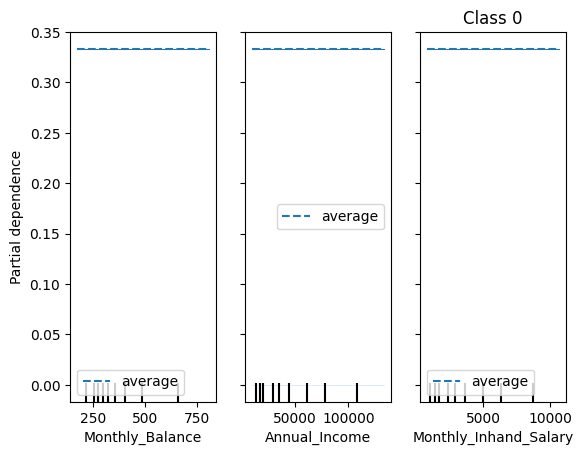


Partial Dependence Plots for Class 1:


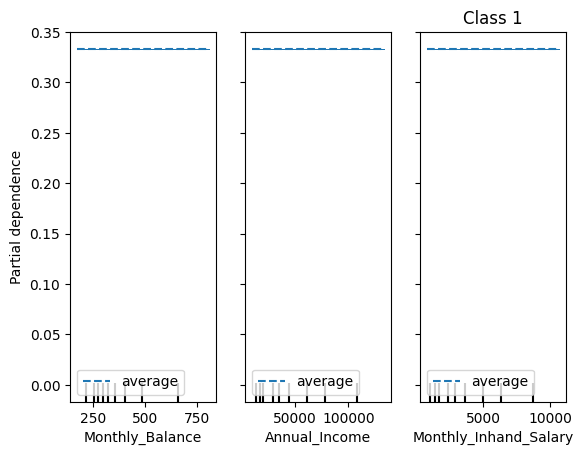


Partial Dependence Plots for Class 2:


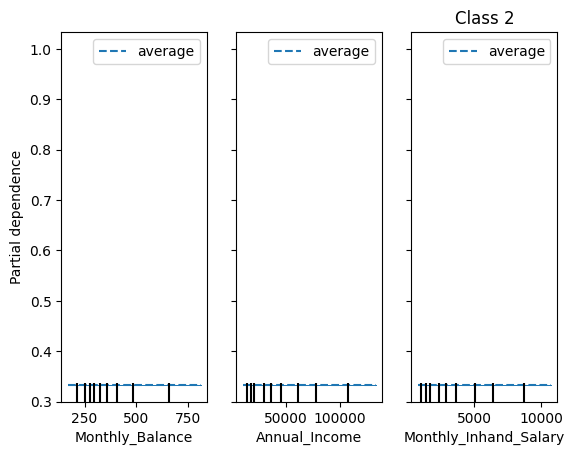

In [ ]:
top_features = coef_dfs[0]["Feature"].head(3).tolist()

for i, class_name in enumerate(logreg.classes_):
    print(f"\nPartial Dependence Plots for Class {class_name}:")
    PartialDependenceDisplay.from_estimator(
        logreg,
        X_train,
        features=top_features,
        target=i,
        kind="both",
        ice_lines_kw={"alpha": 0.2}
    )
    plt.title(f"Class {class_name}")
    plt.show()